<p><font size="6"><b> Basic operations on Series and DataFrames</b></font></p>

In [2]:
%matplotlib inline

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.


In [3]:
# redefining the example objects

population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

In [4]:
countries.head()

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


# The 'new' concepts

## Elementwise-operations 

Just like with numpy arrays, many operations are element-wise:

In [5]:
population / 100

Belgium           0.113
France            0.643
Germany           0.813
Netherlands       0.169
United Kingdom    0.649
dtype: float64

In [6]:
countries['population'] / countries['area']

0    0.000370
1    0.000096
2    0.000228
3    0.000407
4    0.000265
dtype: float64

In [7]:
np.log(countries['population'])

0    2.424803
1    4.163560
2    4.398146
3    2.827314
4    4.172848
Name: population, dtype: float64

which can be added as a new column, as follows:

In [8]:
countries["log_population"] = np.log(countries['population'])

In [11]:
countries.columns

Index(['area', 'capital', 'country', 'population', 'log_population'], dtype='object')

In [12]:
countries['population'] > 40

0    False
1     True
2     True
3    False
4     True
Name: population, dtype: bool

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the population numbers relative to Belgium</li>
</ul>
</div>

In [95]:
population / population['Belgium']

Belgium           1.000000
France            5.690265
Germany           7.194690
Netherlands       1.495575
United Kingdom    5.743363
dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the population density for each country and add this as a new column to the dataframe.</li>
</ul>
</div>

In [96]:
countries['population']*1000000 / countries['area']

0    370.370370
1     95.783158
2    227.699202
3    406.973944
4    265.092721
dtype: float64

In [97]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,area,capital,country,population,density
0,30510,Brussels,Belgium,11.3,370.370370
1,671308,Paris,France,64.3,95.783158
2,357050,Berlin,Germany,81.3,227.699202
3,41526,Amsterdam,Netherlands,16.9,406.973944
4,244820,London,United Kingdom,64.9,265.092721


<div class="alert alert-danger">

**WARNING**: **Alignment!** (unlike numpy)

 <ul>
  <li>Pay attention to **alignment**: operations between series will align on the index:  </li>
</ul> 

</div>

In [98]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [99]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [100]:
s2

France     64.3
Germany    81.3
dtype: float64

In [101]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

## Aggregations (reductions)

Pandas provides a large set of **summary** functions that operate on different kinds of pandas objects (DataFrames, Series, Index) and produce single value. When applied to a DataFrame, the result is returned as a pandas Series (one value for each column). 

The average population number:

In [102]:
population.mean()

47.739999999999995

The minimum area:

In [103]:
countries['area'].min()

30510

For dataframes, often only the numeric columns are included in the result:

In [104]:
countries.median()

area          244820.000000
population        64.300000
density          265.092721
dtype: float64

# Application on a real dataset

Reading in the titanic data set...

In [109]:
df = pd.read_csv("../data/titanic.csv")

Quick exploration first...

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
len(df)

891

The available metadata of the titanic data set provides the following information:

VARIABLE   |  DESCRIPTION
------ | --------
survival       | Survival (0 = No; 1 = Yes)
pclass         | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name           | Name
sex            | Sex
age            | Age
sibsp          | Number of Siblings/Spouses Aboard
parch          | Number of Parents/Children Aboard
ticket         | Ticket Number
fare           | Passenger Fare
cabin          | Cabin
embarked       | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the average age of the passengers?</li>
</ul>

</div>

In [113]:
df['Age'].mean()

29.69911764705882

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the distribution of the fares the passengers paid?</li>
</ul>
</div>

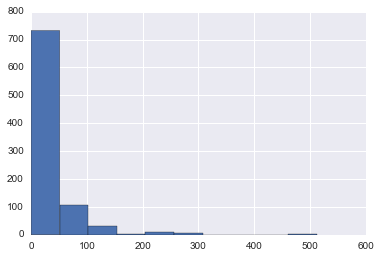

In [123]:
df['Fare'].hist() #bins=30, log=True

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the survival ratio?</li>
</ul>
</div>

In [128]:
df['Survived'].sum()/len(df['Survived'])

0.38383838383838381

In [129]:
df['Survived'].mean()

0.38383838383838381

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare?</li>
</ul>
</div>

In [130]:
df['Fare'].max()

512.32920000000001

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the 75th percentile (`quantile`) of the Fare price</li>
</ul>
</div>

In [143]:
df['Fare'].quantile(0.75)

31.0

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Calculate the normalized Fares (relative to its mean)</li>
</ul>
</div>

In [144]:
df['Fare'] / df['Fare'].mean()

0      0.225126
1      2.213478
2      0.246086
3      1.648853
4      0.249967
5      0.262646
6      1.610426
7      0.654418
8      0.345709
9      0.933754
10     0.518566
11     0.824426
12     0.249967
13     0.971146
14     0.243887
15     0.496829
16     0.904385
17     0.403674
18     0.558933
19     0.224350
20     0.807348
21     0.403674
22     0.249321
23     1.102340
24     0.654418
25     0.974640
26     0.224350
27     8.166635
28     0.244664
29     0.245179
         ...   
861    0.357096
862    0.805149
863    2.159656
864    0.403674
865    0.403674
866    0.430326
867    1.567988
868    0.294993
869    0.345709
870    0.245179
871    1.631905
872    0.155259
873    0.279467
874    0.745244
875    0.224350
876    0.305730
877    0.245179
878    0.245179
879    2.582218
880    0.807348
881    0.245179
882    0.326563
883    0.326044
884    0.218915
885    0.904385
886    0.403674
887    0.931555
888    0.728166
889    0.931555
890    0.240652
Name: Fare, dtype: float

## Acknowledgement


> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).

---